In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from imblearn.combine import SMOTETomek
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [2]:
wine1=pd.read_csv("../input/wine-quality/winequalityN.csv")

In [3]:
wine1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
wine1.loc[:,wine1.isnull().any()].columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'pH', 'sulphates'],
      dtype='object')

In [7]:
x=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'pH', 'sulphates']
for i in x:
    wine1[i]=wine1[i].fillna(wine1[i].mean())
   

In [8]:
wine1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
for i in range(6497):
    if wine1["quality"].loc[i]>6:
            wine1["quality"].loc[i]=1
    else:
            wine1["quality"].loc[i]=0

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
wine1["quality"].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

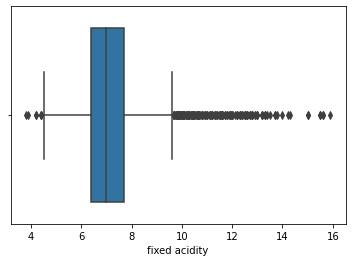

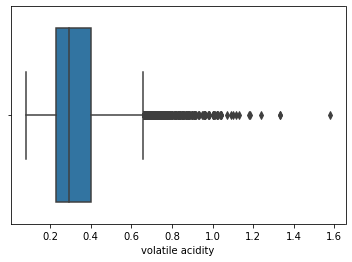

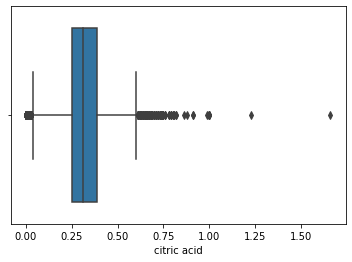

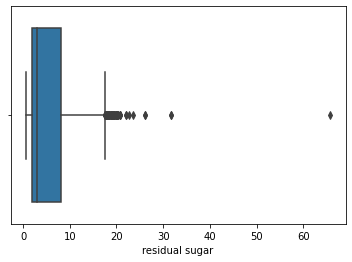

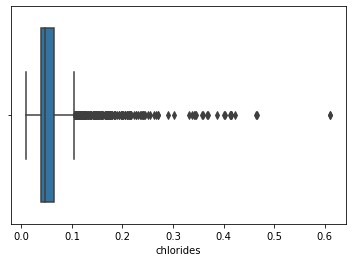

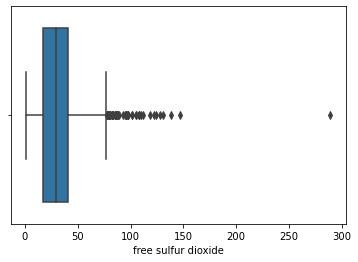

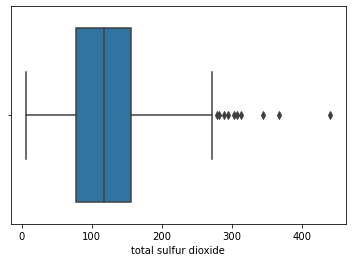

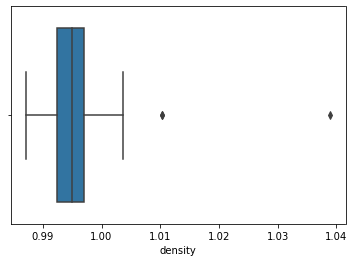

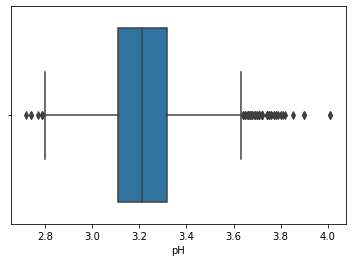

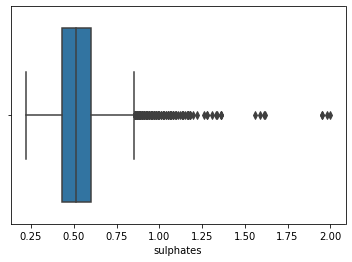

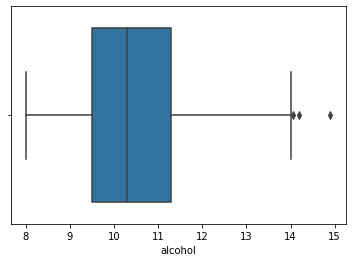

In [11]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       ]:
    
    sns.boxplot(wine1[i])
    plt.show()

In [12]:
d=[]
q={0:'fixed acidity', 
   1:'volatile acidity', 
   2:'citric acid',
  3:'residual sugar', 
   4:'chlorides', 
   5:'free sulfur dioxide',
    6:'total sulfur dioxide', 
   7:'density', 
   8:'pH',
   9:'sulphates', 
   10:'alcohol',
       }
for x,y in q.items():
    if x==0:
        for i in range(6497):
             if wine1[y].loc[i]>14:
                    d.append(i)
    if x==1:
        for i in range(6497):
             if wine1[y].loc[i]>1.2:
                    d.append(i)
    if x==2:
        for i in range(6497):
             if wine1[y].loc[i]>1:
                    d.append(i)
    if x==3:
        for i in range(6497):
             if wine1[y].loc[i]>25:
                    d.append(i)
    if x==4:
        for i in range(6497):
             if wine1[y].loc[i]>0.4:
                    d.append(i)
    if x==5:
        for i in range(6497):
             if wine1[y].loc[i]>140:
                    d.append(i)
    if x==6:
        for i in range(6497):
             if wine1[y].loc[i]>310:
                    d.append(i)
    if x==7:
        for i in range(6497):
             if wine1[y].loc[i]>1.01:
                    d.append(i)
    if x==8:
        for i in range(6497):
             if wine1[y].loc[i]>3.8:
                    d.append(i)
    if x==9:
        for i in range(6497):
             if wine1[y].loc[i]>1.50:
                    d.append(i)
    if x==10:
        for i in range(6497):
             if wine1[y].loc[i]>14:
                    d.append(i)
        
        

In [13]:
d

[1526,
 5141,
 5142,
 5340,
 5442,
 5452,
 5453,
 5455,
 5550,
 5024,
 5025,
 5570,
 6197,
 745,
 3152,
 1653,
 1663,
 2781,
 3619,
 3623,
 4979,
 4981,
 5004,
 5049,
 5156,
 5349,
 5590,
 5652,
 5949,
 6158,
 6217,
 6268,
 6270,
 1931,
 4745,
 325,
 1417,
 2127,
 4745,
 1653,
 1663,
 2781,
 1250,
 1255,
 4943,
 4993,
 5593,
 6214,
 6219,
 4911,
 4984,
 4989,
 4990,
 5049,
 5067,
 5124,
 5621,
 3918,
 4503,
 5550]

In [14]:
wine1.drop([1526, 5141, 5142, 5340, 5442, 5452, 5453, 5455, 5550, 5024, 5025, 5570, 6197, 745, 3152, 1653, 1663, 2781, 3619, 3623, 4979, 4981, 5004, 5049, 5156, 5349, 5590, 5652, 5949, 6158, 6217, 6268, 6270, 1931, 4745, 325, 1417, 2127, 4745, 1653, 1663, 2781, 1250, 1255, 4943, 4993, 5593, 6214, 6219, 4911, 4984, 4989, 4990, 5049, 5067, 5124, 5621, 3918, 4503, 5550],inplace=True)

In [15]:
wine1.drop("type",axis=1,inplace=True)

In [16]:
wine1.shape

(6443, 12)

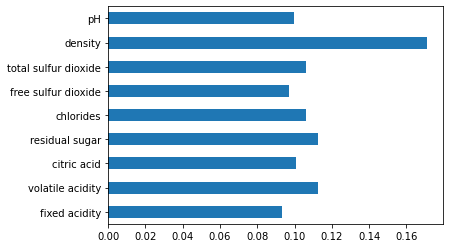

In [17]:
X=wine1.iloc[:,0:9]
y=wine1.iloc[:,-1]
m=ExtraTreesClassifier()
m.fit(X,y)
ft=pd.Series(m.feature_importances_,index=X.columns)
ft.plot(kind='barh')
plt.show()

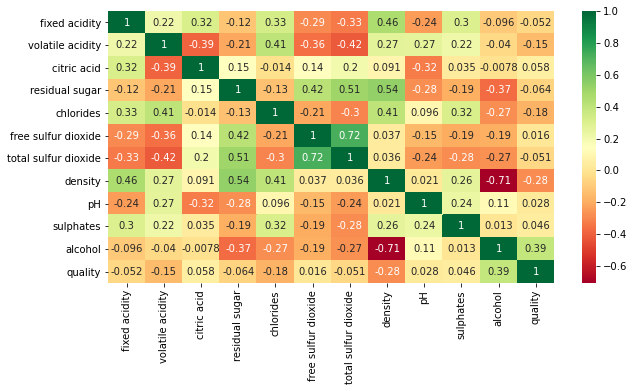

In [18]:
c=wine1.corr()
tcf=c.index
plt.figure(figsize=(10,5))
sns.heatmap(wine1[tcf].corr(),annot=True,cmap="RdYlGn")

In [19]:
wine1.drop(["free sulfur dioxide","pH"],axis=1,inplace=True)

In [20]:
bala=SMOTETomek(random_state=42)
X_bal,y_bal=bala.fit_sample(X,y)

In [21]:
from collections import Counter
print('original{}'.format(Counter(y)))
print('resampled{}'.format(Counter(y_bal)))

originalCounter({0: 5172, 1: 1271})
resampledCounter({0: 5061, 1: 5061})


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()
features=scaler.fit_transform(X_bal)

In [24]:
label=y_bal

In [25]:
from sklearn.model_selection import train_test_split
import numpy
numpy.random.seed(1234)
(x_train,x_test,y_train,y_test) = train_test_split(features,label, train_size=0.75, random_state=42)

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)

In [27]:
clf.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [28]:
clf.score(x_test,y_test)

0.7388384037929672

In [29]:
y_pred =clf.predict(x_test)

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 868,  395],
       [ 266, 1002]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.72      1263
           1       0.72      0.79      0.75      1268

    accuracy                           0.74      2531
   macro avg       0.74      0.74      0.74      2531
weighted avg       0.74      0.74      0.74      2531



In [32]:
 cross_val_score(clf, features, label, cv=10).mean()

0.7241556407024883

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(x_train,y_train)


DecisionTreeClassifier(random_state=1)

In [34]:
clf.score(x_test,y_test)

0.8569735282497036

In [35]:
scores = cross_val_score(clf, features, label, cv=10)

In [36]:
scores

array([0.76900296, 0.78973346, 0.80039526, 0.85968379, 0.80533597,
       0.81126482, 0.77667984, 0.84387352, 0.84387352, 0.83201581])

In [37]:
scores.mean()

0.8131858956100342

In [38]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(clf, params, verbose=1, cv=3)

In [39]:
grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   25.1s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [40]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=99, random_state=1)

In [41]:
grid_search_cv.best_estimator_.score(x_train,y_train)

0.846265314187854

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf,features,label, cv=10)

cv_scores.mean()

0.8647549251040818

In [43]:
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search_cv = GridSearchCV(clf, param_grid, verbose=1, cv=3)

In [44]:
grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.7min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, random_state=1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=1)

In [45]:
grid_search_cv.best_estimator_.score(x_test,y_test)

0.9190043461082577

In [46]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, features, label, cv=10)

cv_scores.mean()

0.7789946115518029

In [47]:

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(clf, features, label, cv=10)

cv_scores.mean()

0.8428145570040073

In [48]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, features, label, cv=10)
    print (n, cv_scores.mean())

1 0.8428145570040073
2 0.8454813706401758
3 0.8185121093765242
4 0.8206867052429093
5 0.7998396341629956
6 0.8031007963666017
7 0.7882802227173231
8 0.7890724923816472
9 0.7782037075332925
10 0.7789946115518029
11 0.7711892629024266
12 0.7743507329616176
13 0.7651631556563098
14 0.7707938108931713
15 0.7644713585054372
16 0.7677318378861363
17 0.7589388346749177
18 0.7646691820561944
19 0.7559752857126135
20 0.7587420841315857
21 0.7539001868983842
22 0.7573587824682292
23 0.7516276547179161
24 0.7544937550967854
25 0.7492566984927171
26 0.7535056128042951
27 0.7486644959401301
28 0.7513319923992057
29 0.7477751678768889
30 0.7492575764078832
31 0.7480706351033404
32 0.7498486084069156
33 0.74737835022182
34 0.7495519706269095
35 0.7470817124418138
36 0.7486621548330206
37 0.7445123473890803
38 0.7450072964504914
39 0.7427348618161529
40 0.743130313825408
41 0.7404621345434255
42 0.7426365353175516
43 0.7403638080448244
44 0.7443153042073596
45 0.740066975172559
46 0.7427344716316344
4

In [49]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc, features,label, cv=10)
cv_scores.mean()

0.7812655829941979

In [50]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid_search_cv = GridSearchCV(svc, param_grid, verbose=1, cv=3)
grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [51]:
grid_search_cv.best_estimator_.score(x_test,y_test)

0.916633741604109

In [52]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc,features,label, cv=10)
cv_scores.mean()

0.5423727705832089

In [53]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid_search_cv = GridSearchCV(svc, param_grid, verbose=1, cv=3)
grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [54]:
grid_search_cv.best_estimator_.score(x_test,y_test)

0.7404188067957329